In [1]:
from vpt.common import *
import vpt.settings as s

s.sensor = "realsense"

In [2]:
hands = np.load("data/rdf/training/p6/000072.npz")
m = hands["dmap"]
mask = hands['mask']

In [21]:
# # m = np.random.randint(0, 100, (10,10))
# m = np.array([[0, 0, 0, 0, 0],
#               [0, 0, 0, 0, 0],
#               [100, 100, 150, 100, 100],
#               [200, 201, 195, 190, 180],
#               [150, 80, 75, 80, 99]])

np.random.seed(0)
offsets_u = np.random.randint(-100000, 100000, (50,2))
offsets_v = np.random.randint(-100000, 100000, (50,2))

# offsets_u = np.array([[300, 250], [250, 198], [99, 68], [100,90]])
# offsets_v = np.array([[100, 90], [125, 36], [10, 50], [9,100]])
max_val = 10000
m[m==0] = max_val

In [22]:
print(offsets_u[0])

[ 99340 -56433]


In [23]:
m_ = m.ravel()
offsets_u_ = np.repeat(offsets_u[np.newaxis, :], len(m_), axis=0)
offsets_v_ = np.repeat(offsets_v[np.newaxis, :], len(m_), axis=0)
m_ = np.repeat(m_[:, np.newaxis], offsets_u.shape[0], axis=1)
m_ = np.repeat(m_[:,:, np.newaxis], offsets_u.shape[1], axis=2)

In [24]:
offsets_u_ = offsets_u_ / m_
offsets_v_ = offsets_v_ / m_

In [25]:
print(offsets_u_.shape)

(92160, 50, 2)


In [26]:
indexes = np.indices(m.shape)
indexes = np.moveaxis(indexes, 0, 2)
indexes = np.reshape(indexes, (indexes.shape[0]*indexes.shape[1], indexes.shape[2]))
indexes = np.repeat(indexes[:, np.newaxis, :], offsets_u.shape[0], axis=1)

In [27]:
indexes_u = indexes+offsets_u_
indexes_v = indexes+offsets_v_

In [28]:
indexes_u = indexes_u.astype(int)
indexes_v = indexes_v.astype(int)

In [29]:
indexes_u[:, :, 0][indexes_u[:, :, 0] >= m.shape[0]] = -1
indexes_u[:, :, 1][indexes_u[:, :, 1] >= m.shape[1]] = -1
indexes_u[indexes_u < 0] = -1

indexes_v[:, :, 0][indexes_v[:, :, 0] >= m.shape[0]] = -1
indexes_v[:, :, 1][indexes_v[:, :, 1] >= m.shape[1]] = -1
indexes_v[indexes_v < 0] = -1

In [30]:
d_u = np.ones((offsets_u_.shape[0], offsets_u_.shape[1])) * max_val
d_v = np.ones((offsets_v_.shape[0], offsets_v_.shape[1])) * max_val

In [31]:
idxes_u = np.all(indexes_u != -1, axis=2)
idxes_v = np.all(indexes_v != -1, axis=2)

In [32]:
d_u[idxes_u] = m[indexes_u[idxes_u][:, 0], indexes_u[idxes_u][:, 1]]
d_v[idxes_v] = m[indexes_v[idxes_v][:, 0], indexes_v[idxes_v][:, 1]]

In [33]:
print(d_u[150], d_v[150])
print(m[150,180])

[ 10000.  10000.  10000.  10000.  10000.  10000.  10000.  10000.  10000.
  10000.  10000.  10000.  10000.  10000.  10000.  10000.  10000.  10000.
  10000.  10000.  10000.  10000.  10000.  10000.  10000.  10000.  10000.
  10000.  10000.  10000.  10000.  10000.  10000.  10000.  10000.  10000.
  10000.  10000.  10000.  10000.  10000.  10000.  10000.  10000.  10000.
  10000.  10000.  10000.  10000.  10000.] [ 10000.  10000.  10000.  10000.  10000.  10000.  10000.  10000.  10000.
  10000.  10000.  10000.  10000.  10000.  10000.  10000.  10000.  10000.
  10000.  10000.  10000.  10000.  10000.  10000.  10000.  10000.  10000.
  10000.  10000.  10000.  10000.  10000.  10000.  10000.  10000.  10000.
  10000.  10000.  10000.  10000.  10000.  10000.  10000.  10000.  10000.
  10000.  10000.  10000.  10000.  10000.]
748


In [34]:
features = d_u-d_v

In [35]:
print(features.max())
features = np.reshape(features, (m.shape[0], m.shape[1], len(offsets_u)))
avg = np.average(features, axis=2)

9317.0


In [36]:
features[150,180]

array([  0.00000000e+00,   9.24400000e+03,   0.00000000e+00,
         3.00000000e+00,  -9.26400000e+03,  -9.30500000e+03,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -9.29600000e+03,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,  -9.31000000e+03,  -5.00000000e+00,
        -1.30000000e+01,   9.24900000e+03,   2.00000000e+00,
         9.25600000e+03,   9.22700000e+03,  -1.00000000e+01,
        -9.25200000e+03,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   9.25100000e+03,
        -9.25000000e+03,   9.25200000e+03,   9.25400000e+03,
         0.00000000e+00,   0.00000000e+00,  -9.25000000e+03,
         0.00000000e+00,   9.25200000e+03,   0.00000000e+00,
         9.25800000e+03,  -9.24800000e+03,   0.00000000e+00,
        -9.24600000e+03,

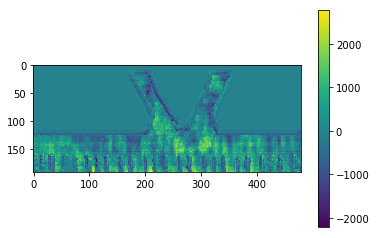

In [37]:
plt.imshow(avg)
plt.colorbar()
plt.show()

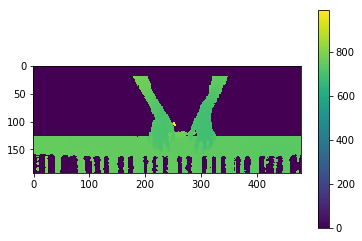

In [20]:
m_plt = m.copy()
m_plt[m_plt==10000] = 0
plt.imshow(m_plt)
plt.colorbar()
plt.show()